Deep Learning Assignment 1 
MIS No.: 122122014
Name : Madhura Sawarkar


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [32]:
#import dataset
df = pd.read_csv("/home/mad/Downloads/titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_sex = pd.get_dummies(df.Sex)

In [33]:
#Dropping non-numeric Columns 
df = df.drop(columns=["Name","Ticket","Cabin","Embarked","Sex"])

In [7]:
df = pd.concat([df_sex,df],axis=1)

In [8]:
df.isnull().sum()

female           0
male             0
PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [9]:
#Dropping null values
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

female         0
male           0
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [11]:
No_cols = df.columns.size
No_cols

9

In [12]:
df.describe()

,female,male,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.365546,0.634454,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.481921,0.481921,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,1.000000,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,1.000000,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,1.000000,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [13]:
df.shape

(714, 9)

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Survived'])
y = df["Survived"]
smt = SMOTE(sampling_strategy='minority')
X,y = smt.fit_resample(X,y)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.1, random_state = 15)


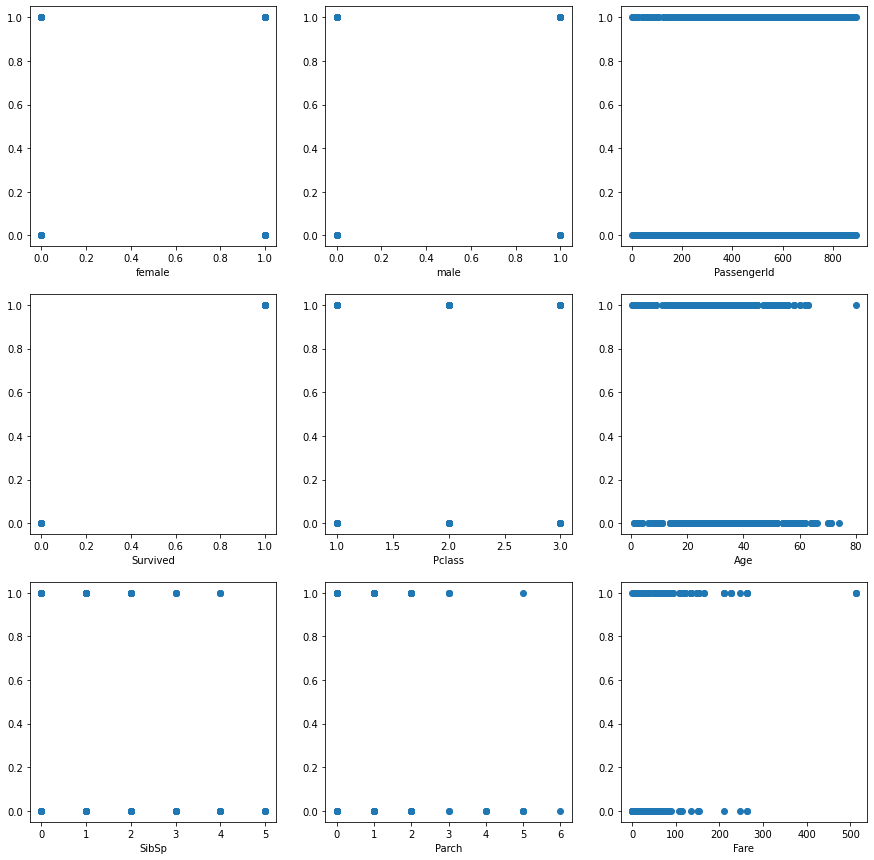

In [15]:
plt.figure(figsize=(15,15))
for j in range(No_cols):
    plt.subplot(3,3,j+1)
    x = df[df.columns[j]] 
    y = df['Survived']
    plt.scatter(x, y)
    plt.xlabel(df.columns[j])

In [16]:
x_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])
x_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

In [17]:
# convert Inputs in to Binary values [as MP-Neuron works only on Binary values]
X_test = x_binarised_test.values
X_train = x_binarised_train.values

In [18]:
for b in range(X_train.shape[1] + 1):
    y_pred_train = []
    accurate_rows = 0

    for x, y in zip(X_train, y_train):
        y_pred = (np.sum(x) >= b)
        y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)

    print(b, accurate_rows, accurate_rows/X_train.shape[0])

0 381 0.49934469200524245
1 381 0.49934469200524245
2 381 0.49934469200524245
3 381 0.49934469200524245
4 383 0.5019659239842726
5 414 0.5425950196592398
6 477 0.6251638269986893
7 471 0.617300131061599
8 401 0.5255570117955439


In [19]:
b = 6
y_pred_test = []
accurate_rows = 0

for x, y in zip(X_test, y_test):
    y_pred = (np.sum(x) >= b)
    y_pred_test.append(y_pred)
    accurate_rows += (y == y_pred)

print(b, accurate_rows, accurate_rows/X_test.shape[0])

6 49 0.5764705882352941


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)

<AxesSubplot:>

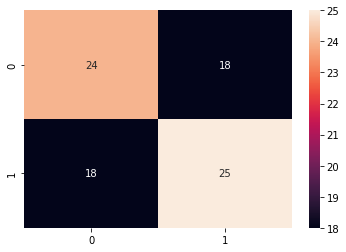

In [21]:
import seaborn as sn
sn.heatmap(cm,annot=True)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        42
           1       0.58      0.58      0.58        43

    accuracy                           0.58        85
   macro avg       0.58      0.58      0.58        85
weighted avg       0.58      0.58      0.58        85



In [24]:
class MPNeuron:
    def __init__(self):
        self.b = None
    def getThreshold(self):
        return self.b
    def model(self, x):
        return(np.sum(x)>=self.b)
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y):
        accuracy = {}   #dictionary     key-value pair
        for b in range(X.shape[1]+1):
            self.b = b
            y_pred_train = self.predict(X)
            accuracy[b] = accuracy_score(y_pred_train, Y)
        
        best_b = max(accuracy, key = accuracy.get)
        self.b = best_b
        
        print("optimal threshold for MP neuron is: ", self.b)
        print("Highest accuracy is: ", accuracy[self.b])
        
    def test(self, X, Y):
        y_pred_train = self.predict(X)
        accuracy = accuracy_score(y_pred_train, Y)
        print("Accuracy of MPNeuron for test data is: ", accuracy)

In [25]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_train, y_train)

optimal threshold for MP neuron is:  6
Highest accuracy is:  0.6251638269986893


In [26]:
predicted = mp_neuron.predict(X_test)
accuracy_test = accuracy_score(predicted, y_test)
print(accuracy_test)

0.5764705882352941


In [27]:
class Perceptron:
# Globl variables weight and bias
    def __init__ (self):
        self.w = None
        self.b = None

# model
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y, epochs = 1, lr = 1):
        self.w = np.ones(X.shape[1])
        self.b = 0
        
        accuracy = {}
        max_accuracy = 0
        
        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                
                if  y == 1 and y_pred == 0:
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1
            
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b
                 
        self.w = chkptw
        self.b = chkptb
        
        print("Max Accuracy", max_accuracy)
        
        plt.plot(list(accuracy.values()))
        plt.ylim([0, 1])
        plt.show()

Max Accuracy 0.7903014416775884


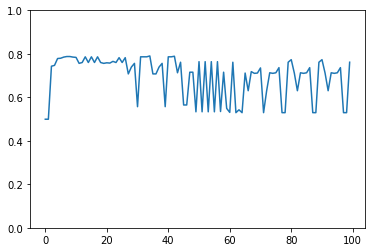

In [28]:
perceptron =Perceptron()
perceptron.fit(X_train, y_train,100,0.001)

In [29]:
predicted = perceptron.predict(X_test)
accuracy_test = accuracy_score(predicted, y_test)
print(accuracy_test)


0.7529411764705882


<AxesSubplot:>

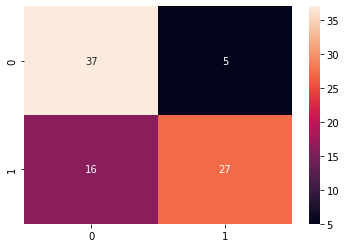

In [30]:
cm = confusion_matrix(y_test,predicted)
sn.heatmap(cm,annot=True)

In [31]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        42
           1       0.58      0.58      0.58        43

    accuracy                           0.58        85
   macro avg       0.58      0.58      0.58        85
weighted avg       0.58      0.58      0.58        85

